In [1]:
import os
import cv2
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# File Directory for both the train and test
train_path = r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\train'
val_path = r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\valid'
test_path = r'C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\test'

In [3]:
def GetDatasetSize(path):
    num_of_image = {}
    for folder in os.listdir(path):
        # Counting the Number of Files in the Folder
        num_of_image[folder] = len(os.listdir(os.path.join(path, folder)));
    return num_of_image;
    
train_set = GetDatasetSize(train_path)
val_set = GetDatasetSize(val_path)
test_set = GetDatasetSize(test_path)
print(train_set,"\n\n",val_set,"\n\n",test_set)

{'adenocarcinoma': 195, 'large_cell_carcinoma': 115, 'normal': 148, 'squamous_cell_carcinoma': 155} 

 {'adenocarcinoma': 23, 'large.cell.carcinoma': 21, 'normal': 13, 'squamous.cell.carcinoma': 15} 

 {'adenocarcinoma': 120, 'large.cell.carcinoma': 51, 'normal': 54, 'squamous.cell.carcinoma': 90}


AttributeError: 'AxesSubplot' object has no attribute 'bar_label'

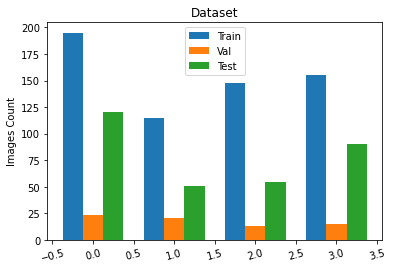

In [4]:
labels = ['squamous.cell.carcinoma', 'normal', 'adenocarcinoma', 'large.cell.carcinoma']
train_list = list(train_set.values())
val_list = list(val_set.values())
test_list = list(test_set.values())

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, train_list, width, label='Train')
rects2 = ax.bar(x, val_list, width, label='Val')
rects3 = ax.bar(x + width, test_list, width, label='Test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Images Count')
ax.set_title('Dataset')
ax.set_xticks(x, labels)
plt.xticks(rotation=15)
ax.legend()

ax.bar_label(rects1)
ax.bar_label(rects2)
ax.bar_label(rects3)

fig.tight_layout()

plt.show()

In [5]:
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras import Model 
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.layers import Dense,Conv2D, Flatten, MaxPool2D, Dropout

In [6]:
train_datagen = ImageDataGenerator(rescale = 1.0/255.0,
                                  horizontal_flip = True,
                                  fill_mode = 'nearest',
                                  zoom_range=0.2,
                                  shear_range = 0.2,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  rotation_range=0.4)

train_data = train_datagen.flow_from_directory(train_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.


In [7]:
train_data.class_indices


{'adenocarcinoma': 0,
 'large_cell_carcinoma': 1,
 'normal': 2,
 'squamous_cell_carcinoma': 3}

In [8]:
val_datagen = ImageDataGenerator(rescale = 1.0/255.0)
val_data = val_datagen.flow_from_directory(val_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 72 images belonging to 4 classes.


In [9]:
val_data.class_indices


{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

In [10]:
test_datagen = ImageDataGenerator(rescale = 1.0/255.0)
test_data = test_datagen.flow_from_directory(test_path,
                                                   batch_size = 5,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical')

Found 315 images belonging to 4 classes.


In [11]:
test_data.class_indices


{'adenocarcinoma': 0,
 'large.cell.carcinoma': 1,
 'normal': 2,
 'squamous.cell.carcinoma': 3}

# CNN Model

In [12]:
model = Sequential() 

# Convolutional Layer with input shape (350,350,3)
model.add(Conv2D(filters=32, kernel_size= (3,3), activation= 'relu', input_shape=(350,350,3)) )

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu' ))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.25))
#model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=4, activation='sigmoid'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']  )
 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 346, 346, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 173, 173, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 171, 171, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 85, 85, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 83, 83, 128)       7

In [13]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_cnn_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [26]:
# Fitting the Model
cnn = model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back
    )

Epoch 1/20
122/122 [==============================] - ETA: 0s - loss: 0.9958 - accuracy: 0.7763
Epoch 1: val_accuracy improved from -inf to 0.64286, saving model to .\ct_resnet_best_model.hdf5
122/122 [==============================] - 544s 4s/step - loss: 0.9958 - accuracy: 0.7763 - val_loss: 2.1253 - val_accuracy: 0.6429
Epoch 2/20
122/122 [==============================] - ETA: 0s - loss: 0.9811 - accuracy: 0.7796
Epoch 2: val_accuracy improved from 0.64286 to 0.70000, saving model to .\ct_resnet_best_model.hdf5
122/122 [==============================] - 609s 5s/step - loss: 0.9811 - accuracy: 0.7796 - val_loss: 1.0162 - val_accuracy: 0.7000
Epoch 3/20
122/122 [==============================] - ETA: 0s - loss: 0.9528 - accuracy: 0.7615
Epoch 3: val_accuracy did not improve from 0.70000
122/122 [==============================] - 537s 4s/step - loss: 0.9528 - accuracy: 0.7615 - val_loss: 4.1546 - val_accuracy: 0.5429
Epoch 4/20
122/122 [==============================] - ETA: 0s - loss

In [27]:
# Loading the Best Fit Model
model = load_model("./ct_cnn_best_model.hdf5")

In [28]:
# Checking the Accuracy of the Model 
accuracy_cnn = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_cnn*100} %")

The accuracy of the model is = 53.33333611488342 %


In [29]:
cnn.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

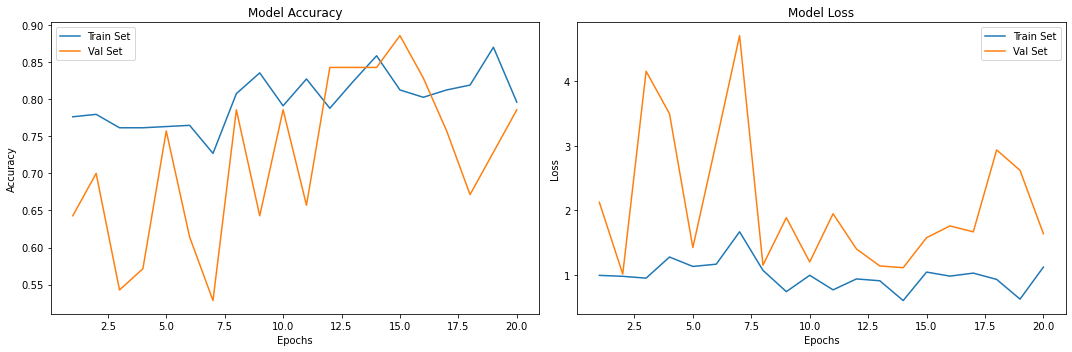

In [30]:
# Plot model performance
acc = cnn.history['accuracy']
val_acc = cnn.history['val_accuracy']
loss = cnn.history['loss']
val_loss = cnn.history['val_loss']
epochs_range = range(1, len(cnn.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

# VGG16 Model

In [44]:
base_model = VGG16(
    weights='imagenet',
    include_top=False, 
    input_shape=(350,350,3)
)

In [45]:
NUM_CLASSES = 4

vgg_model = Sequential()
vgg_model.add(base_model)
vgg_model.add(layers.Flatten())
vgg_model.add(layers.Dropout(0.25))
vgg_model.add(layers.Dense(NUM_CLASSES, activation='sigmoid'))

vgg_model.layers[0].trainable = False

vgg_model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

vgg_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 10, 10, 512)       14714688  
                                                                 
 flatten_2 (Flatten)         (None, 51200)             0         
                                                                 
 dropout_3 (Dropout)         (None, 51200)             0         
                                                                 
 dense_5 (Dense)             (None, 4)                 204804    
                                                                 
Total params: 14,919,492
Trainable params: 204,804
Non-trainable params: 14,714,688
_________________________________________________________________


In [46]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_vgg_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [ mc];

In [53]:
# Fitting the Model
vgg = vgg_model.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/20
122/122 [==============================] - ETA: 0s - loss: 1.2960 - accuracy: 0.7237
Epoch 1: val_accuracy did not improve from 0.71429
122/122 [==============================] - 658s 5s/step - loss: 1.2960 - accuracy: 0.7237 - val_loss: 2.1794 - val_accuracy: 0.6286
Epoch 2/20
122/122 [==============================] - ETA: 0s - loss: 1.0621 - accuracy: 0.7549
Epoch 2: val_accuracy improved from 0.71429 to 0.74286, saving model to .\ct_vgg_best_model.hdf5
122/122 [==============================] - 499s 4s/step - loss: 1.0621 - accuracy: 0.7549 - val_loss: 1.4094 - val_accuracy: 0.7429
Epoch 3/20
122/122 [==============================] - ETA: 0s - loss: 1.2691 - accuracy: 0.7434
Epoch 3: val_accuracy improved from 0.74286 to 0.77143, saving model to .\ct_vgg_best_model.hdf5
122/122 [==============================] - 727s 6s/step - loss: 1.2691 - accuracy: 0.7434 - val_loss: 1.4008 - val_accuracy: 0.7714
Epoch 4/20
122/122 [==============================] - ETA: 0s - loss: 1

In [54]:
# Loading the Best Fit Model 
model = load_model("./ct_vgg_best_model.hdf5")

In [55]:
# Checking the Accuracy of the Model 
accuracy_vgg = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_vgg*100} %")

The accuracy of the model is = 80.63492178916931 %


In [56]:
vgg.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

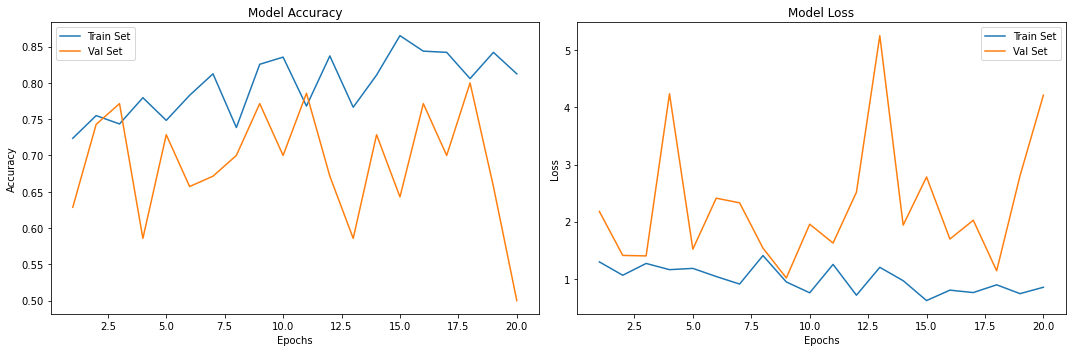

In [57]:
# Plot model performance
acc = vgg.history['accuracy']
val_acc = vgg.history['val_accuracy']
loss = vgg.history['loss']
val_loss = vgg.history['val_loss']
epochs_range = range(1, len(vgg.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

# Inceptionv3 Model 

In [58]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(input_shape = (350, 350, 3), 
                         include_top = False, 
                         weights = 'imagenet')

In [59]:
for layer in base_model.layers:
    layer.trainable = False

In [60]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)

# Add a final sigmoid layer with 4 node for classification output
x = layers.Dense(4, activation='sigmoid')(x)

model_incep = tf.keras.models.Model(base_model.input, x)

model_incep.compile(optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=0.0001), 
                    loss = 'categorical_crossentropy', 
                    metrics = ['accuracy'])

In [61]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_incep_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [62]:
# Fitting the Model
incep = model_incep.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/20
122/122 [==============================] - ETA: 0s - loss: 8.6911 - accuracy: 0.4507
Epoch 1: val_accuracy improved from -inf to 0.47143, saving model to .\ct_incep_best_model.hdf5
122/122 [==============================] - 526s 4s/step - loss: 8.6911 - accuracy: 0.4507 - val_loss: 5.5073 - val_accuracy: 0.4714
Epoch 2/20
122/122 [==============================] - ETA: 0s - loss: 2.8027 - accuracy: 0.6033
Epoch 2: val_accuracy improved from 0.47143 to 0.50000, saving model to .\ct_incep_best_model.hdf5
122/122 [==============================] - 527s 4s/step - loss: 2.8027 - accuracy: 0.6033 - val_loss: 2.2584 - val_accuracy: 0.5000
Epoch 3/20
122/122 [==============================] - ETA: 0s - loss: 1.8528 - accuracy: 0.5872
Epoch 3: val_accuracy did not improve from 0.50000
122/122 [==============================] - 482s 4s/step - loss: 1.8528 - accuracy: 0.5872 - val_loss: 2.7622 - val_accuracy: 0.4714
Epoch 4/20
122/122 [==============================] - ETA: 0s - loss: 

In [63]:
# Loading the Best Fit Model 
model = load_model("./ct_incep_best_model.hdf5")

In [64]:
# Checking the Accuracy of the Model 
accuracy_incep = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_incep*100} %")

The accuracy of the model is = 74.92063641548157 %


In [65]:
incep.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

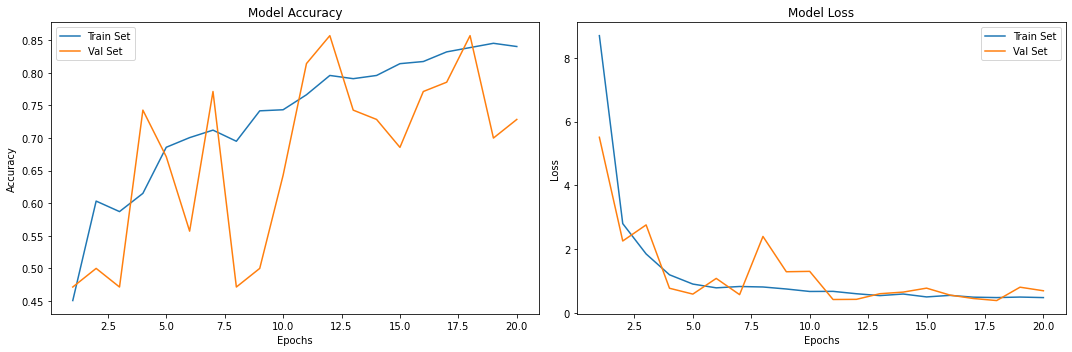

In [66]:
# Plot model performance
acc = incep.history['accuracy']
val_acc = incep.history['val_accuracy']
loss = incep.history['loss']
val_loss = incep.history['val_loss']
epochs_range = range(1, len(incep.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

# RestNet50 Model

In [67]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(350, 350,3),
                      include_top=False, weights="imagenet", 
                      pooling='max')

In [68]:
for layer in base_model.layers:
    layer.trainable = False

In [69]:
model_resnet = Sequential()
model_resnet.add(base_model)
model_resnet.add(Dense(4, activation='sigmoid'))
model_resnet.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001), 
                     loss = 'categorical_crossentropy', 
                     metrics = ['accuracy'])

In [70]:
# Adding Model check point Callback

mc = ModelCheckpoint(
    filepath="./ct_resnet_best_model.hdf5",
    monitor= 'val_accuracy', 
    verbose= 1,
    save_best_only= True, 
    mode = 'auto'
    );

call_back = [mc];

In [72]:
# Fitting the Model
resnet = model_incep.fit(
    train_data, 
    steps_per_epoch = train_data.samples//train_data.batch_size, 
    epochs = 20, 
    validation_data = val_data, 
    validation_steps = val_data.samples//val_data.batch_size,
    callbacks = call_back 
    )

Epoch 1/20
122/122 [==============================] - ETA: 0s - loss: 0.4587 - accuracy: 0.8503
Epoch 1: val_accuracy did not improve from 0.81429
122/122 [==============================] - 434s 4s/step - loss: 0.4587 - accuracy: 0.8503 - val_loss: 0.6882 - val_accuracy: 0.6714
Epoch 2/20
122/122 [==============================] - ETA: 0s - loss: 0.4224 - accuracy: 0.8586
Epoch 2: val_accuracy did not improve from 0.81429
122/122 [==============================] - 435s 4s/step - loss: 0.4224 - accuracy: 0.8586 - val_loss: 1.5257 - val_accuracy: 0.6143
Epoch 3/20
122/122 [==============================] - ETA: 0s - loss: 0.3966 - accuracy: 0.8717
Epoch 3: val_accuracy did not improve from 0.81429
122/122 [==============================] - 429s 4s/step - loss: 0.3966 - accuracy: 0.8717 - val_loss: 0.5269 - val_accuracy: 0.8000
Epoch 4/20
122/122 [==============================] - ETA: 0s - loss: 0.3748 - accuracy: 0.8832
Epoch 4: val_accuracy did not improve from 0.81429
122/122 [=======

In [73]:
# Loading the Best Fit Model 
model = load_model("./ct_resnet_best_model.hdf5")

In [74]:
# Checking the Accuracy of the Model 
accuracy_resnet = model.evaluate_generator(generator= test_data)[1] 
print(f"The accuracy of the model is = {accuracy_resnet*100} %")

The accuracy of the model is = 82.53968358039856 %


In [75]:
resnet.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

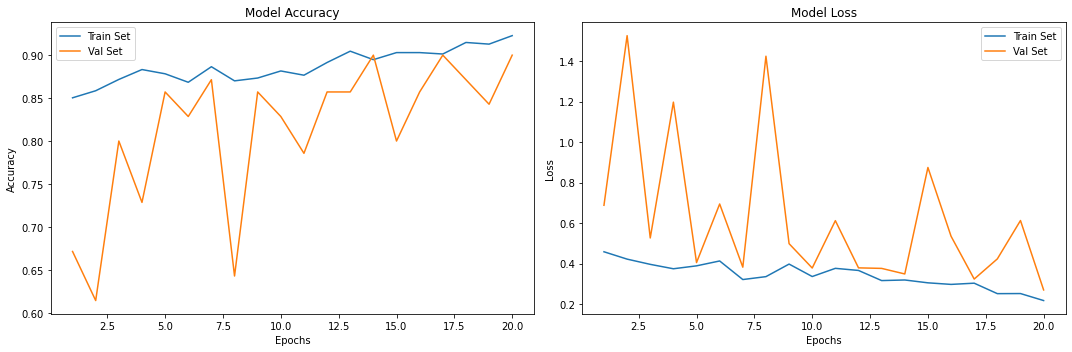

In [76]:
# Plot model performance
acc = resnet.history['accuracy']
val_acc = resnet.history['val_accuracy']
loss = resnet.history['loss']
val_loss = resnet.history['val_loss']
epochs_range = range(1, len(resnet.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()

# Comparison

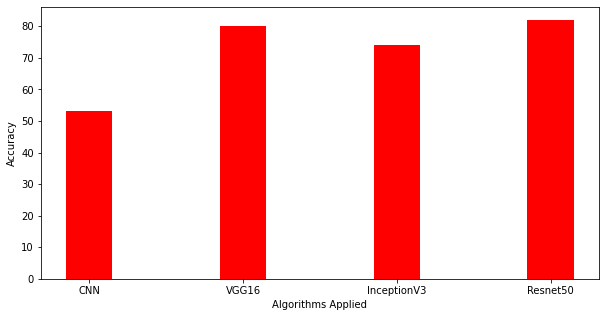

In [77]:
algos = ['CNN', 'VGG16', 'InceptionV3', 'Resnet50']
accuracy = [accuracy_cnn, accuracy_vgg, accuracy_incep, accuracy_resnet]
accuracy = np.floor([i * 100 for i in accuracy])
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(algos, accuracy, color ='red', width = 0.3)
 
plt.xlabel("Algorithms Applied")
plt.ylabel("Accuracy")
plt.show()

# Prediction

In [78]:
def chestScanPrediction(path, _model):
    classes_dir = ["Adenocarcinoma","Large cell carcinoma","Normal","Squamous cell carcinoma"]
    # Loading Image
    img = image.load_img(path, target_size=(350,350))
    # Normalizing Image
    norm_img = image.img_to_array(img)/255
    # Converting Image to Numpy Array
    input_arr_img = np.array([norm_img])
    # Getting Predictions
    pred = np.argmax(_model.predict(input_arr_img))
    # Printing Model Prediction
    print(classes_dir[pred])

In [80]:
path = r"C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\valid\adenocarcinoma\000113.png"
chestScanPrediction(path,model_incep)

1/1 [==============================] - 8s 8s/step
Adenocarcinoma


In [81]:
path = r"C:\Users\Lenovo\Documents\Zahid\MAKAUT\Project\Data\valid\squamous.cell.carcinoma\000111.png"
chestScanPrediction(path,model_incep)

1/1 [==============================] - 1s 608ms/step
Squamous cell carcinoma
